# HW03
# Student: Pravilov Mikhail

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm

global_random_seed = 4526
np.random.seed(global_random_seed)
dataset_root="../Datasets/"

# SVM

Dataset: blobs2.csv.

(3) Apply an SVM classifier (for example, from sklearn package) to blobs2.csv dataset and draw the result (both the support vectors and the separation hyperplane). Use the following kernels:
    
    Linear.
    
    Polynomial, degree 2.
    
    Polynomial, degree 3.
    
    Polynomial, degree 5.
    
    Radial Basis Function.

Let's load blobs2.csv

In [2]:
# blobs2.csv loading
blobs2_path = dataset_root + 'blobs2.csv'
blobs2_data = pd.read_csv(blobs2_path)
blobs2_data = blobs2_data.values
blobs2_X = blobs2_data[:, 0:-1].astype('float64')
blobs2_y = blobs2_data[:, -1]
print("blobs2 datapoints shape: " + str(blobs2_X.shape))
print("blobs2 labels shape: " + str(blobs2_y.shape))

blobs2 datapoints shape: (1000, 2)
blobs2 labels shape: (1000,)


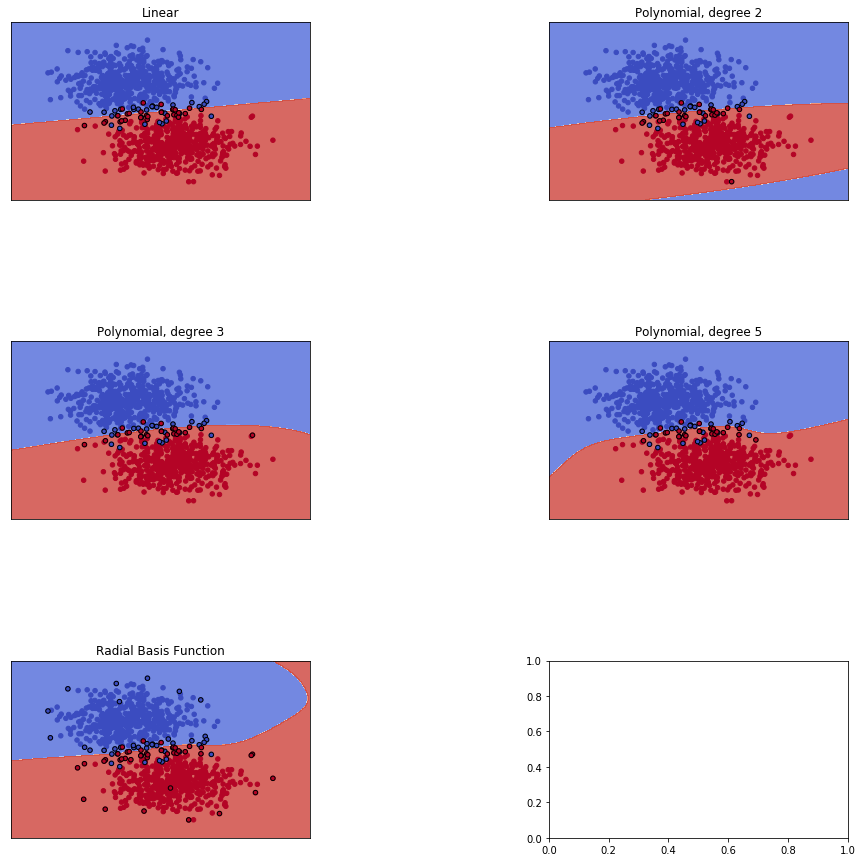

In [3]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

np.random.seed(global_random_seed)
models = (svm.SVC(kernel='linear', random_state=global_random_seed),
          svm.SVC(kernel='poly', degree=2, gamma='auto', random_state=global_random_seed),
          svm.SVC(kernel='poly', degree=3, gamma='auto', random_state=global_random_seed),
          svm.SVC(kernel='poly', degree=5, gamma='auto', random_state=global_random_seed),
          svm.SVC(kernel='rbf', gamma='auto', random_state=global_random_seed)
          )
models = (clf.fit(blobs2_X, blobs2_y) for clf in models)

titles = ('Linear',
          'Polynomial, degree 2',
          'Polynomial, degree 3',
          'Polynomial, degree 5',
          'Radial Basis Function')

fig, sub = plt.subplots(3, 2, figsize=(15,15))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

X0, X1 = blobs2_X[:, 0], blobs2_X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=blobs2_y, cmap=plt.cm.coolwarm, s=20, edgecolors=None)
    X0_support, X1_support, y_support = X0[clf.support_], X1[clf.support_], blobs2_y[clf.support_]
    ax.scatter(X0_support, X1_support, c=y_support, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Note: support vectors are bounded with black round bound

Datasets: spam.csv and cancer.csv.

(3) Apply SVM and RandomForest methods to cancer.csv and spam.csv dataset. Compare training time with close performance on validation (20%).

Let's load cancer and spam

In [4]:
# spam.csv loading
spam_path = dataset_root + 'spam.csv'
spam_data = pd.read_csv(spam_path)
spam_data = spam_data.values
spam_X = spam_data[:, 0:-1].astype('float64')
spam_y = spam_data[:, -1]
print("spam datapoints shape: " + str(spam_X.shape))
print("spam labels shape: " + str(spam_y.shape))

spam datapoints shape: (4601, 57)
spam labels shape: (4601,)


In [5]:
# cancer.csv loading
cancer_path = dataset_root + 'cancer.csv'
cancer_data = pd.read_csv(cancer_path)
cancer_data = cancer_data.values
cancer_X = cancer_data[:, 1:].astype('float64')
cancer_y = cancer_data[:, 0]
print("cancer datapoints shape: " + str(cancer_X.shape))
print("cancer labels shape: " + str(cancer_y.shape))

cancer datapoints shape: (569, 30)
cancer labels shape: (569,)


In [6]:
val_size=0.2
np.random.seed(global_random_seed)
spam_X_train, spam_X_val, spam_y_train, spam_y_val = train_test_split(spam_X, spam_y,
                                                    stratify=spam_y,
                                                    random_state=global_random_seed,
                                                    test_size=val_size)
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X, cancer_y,
                                                    stratify=cancer_y,
                                                    random_state=global_random_seed,
                                                    test_size=val_size)

In [7]:
def fit_and_measure_time(clf, X_train, y_train):
    import time
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    return end - start

In [8]:
def get_training_time_and_acc(clf, X_train, y_train, X_val, y_val):
    return fit_and_measure_time(clf, X_train, y_train), clf.score(X_val, y_val)
    
def compare_svm_and_random_forest(svm, rf, X_train, y_train, X_val, y_val):
    svm_time, svm_score = get_training_time_and_acc(svm, X_train, y_train, X_val, y_val)
    rf_time, rf_score = get_training_time_and_acc(rf, X_train, y_train, X_val, y_val)
    print("===SVM===")
    print("Time: " + str(svm_time))
    print("Accuracy: " + str(svm_score))
    print("===Random Forest===")
    print("Time: " + str(rf_time))
    print("Accuracy: " + str(rf_score))
    print("===(SVM - Random Forest)===")
    print("Time: " + str(svm_time - rf_time))
    print("Accuracy: " + str(svm_score - rf_score))

In [11]:
# cancer
np.random.seed(global_random_seed)
svm_clf = svm.SVC(kernel='linear', random_state=global_random_seed)
rf = RandomForestClassifier(n_estimators=10, max_depth=1)
print("Cancer dataset")
compare_svm_and_random_forest(svm_clf, rf, cancer_X_train, cancer_y_train, cancer_X_val, cancer_y_val)

Cancer dataset
===SVM===
Time: 1.4074294567108154
Accuracy: 0.956140350877193
===Random Forest===
Time: 0.008619308471679688
Accuracy: 0.9649122807017544
===(SVM - Random Forest)===
Time: 1.3988101482391357
Accuracy: -0.00877192982456143


Looks like on cancer SVM much slower with accuracy about 96%

In [27]:
# spam
np.random.seed(global_random_seed)
svm_clf = svm.SVC(kernel='linear', random_state=global_random_seed)
rf = RandomForestClassifier(n_estimators=10, max_depth=13, random_state=global_random_seed)
print("Spam dataset")
compare_svm_and_random_forest(svm_clf, rf, spam_X_train, spam_y_train, spam_X_val, spam_y_val)

Spam dataset
===SVM===
Time: 169.0495309829712
Accuracy: 0.9294245385450597
===Random Forest===
Time: 0.04812788963317871
Accuracy: 0.9294245385450597
===(SVM - Random Forest)===
Time: 169.001403093338
Accuracy: 0.0


Here SVM is worse even more.